In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression ,Ridge , Lasso
from scipy.stats import boxcox
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


In [97]:
df=pd.read_csv(r"C:\Users\farwee\OneDrive\Desktop\Student_Performance.csv")
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [99]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [100]:
df.duplicated().sum()

np.int64(127)

In [101]:
df.shape

(10000, 6)

In [102]:
df.drop_duplicates(inplace = True)
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [103]:
df.shape

(9873, 6)

In [104]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [105]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


<Axes: ylabel='Count'>

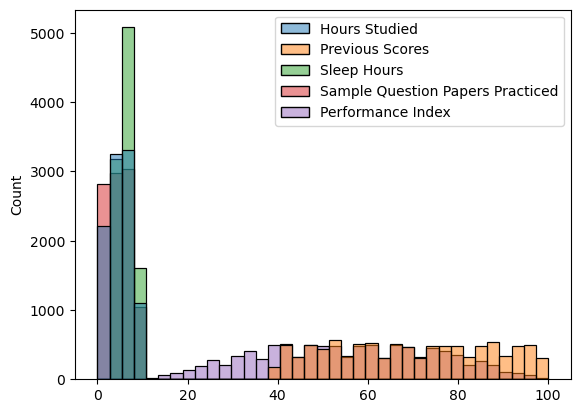

In [106]:
sns.histplot(df)

array([[<Axes: title={'center': 'Hours Studied'}>,
        <Axes: title={'center': 'Previous Scores'}>],
       [<Axes: title={'center': 'Sleep Hours'}>,
        <Axes: title={'center': 'Sample Question Papers Practiced'}>],
       [<Axes: title={'center': 'Performance Index'}>, <Axes: >]],
      dtype=object)

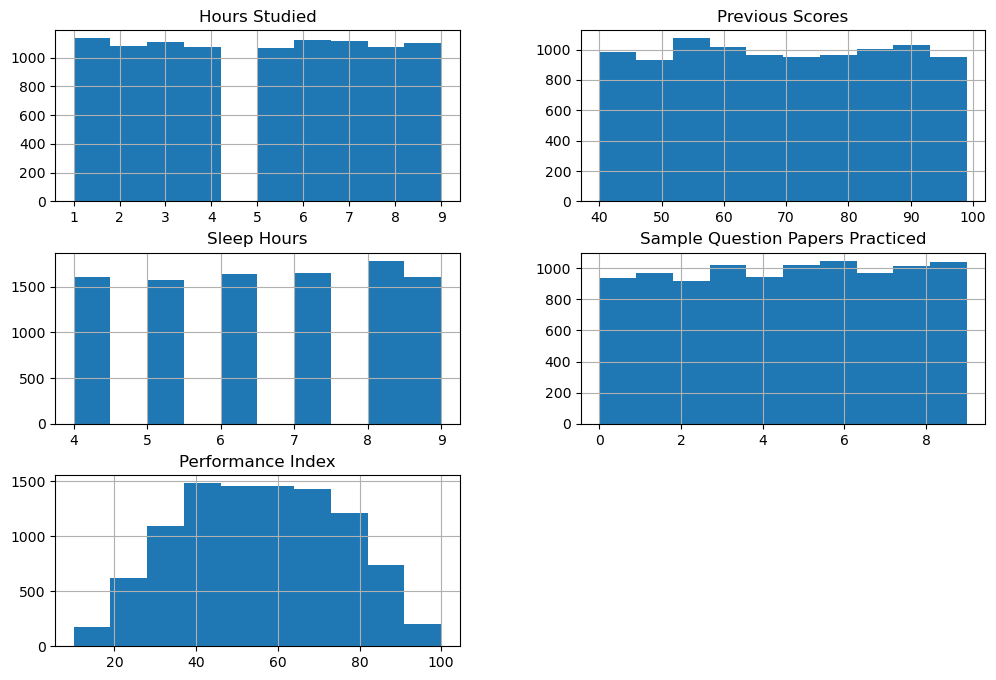

In [107]:
df.hist(figsize=(12,8))

In [108]:
df.skew(numeric_only = True)

Hours Studied                      -0.003348
Previous Scores                     0.005581
Sleep Hours                        -0.041350
Sample Question Papers Practiced   -0.034893
Performance Index                  -0.000412
dtype: float64

In [109]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [110]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df["Encoder_Extra_activities"] = encoder.fit_transform(df["Extracurricular Activities"])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encoder_Extra_activities
0,7,99,Yes,9,1,91.0,1
1,4,82,No,4,2,65.0,0
2,8,51,Yes,7,2,45.0,1
3,5,52,Yes,5,2,36.0,1
4,7,75,No,8,5,66.0,0


<Figure size 640x480 with 0 Axes>

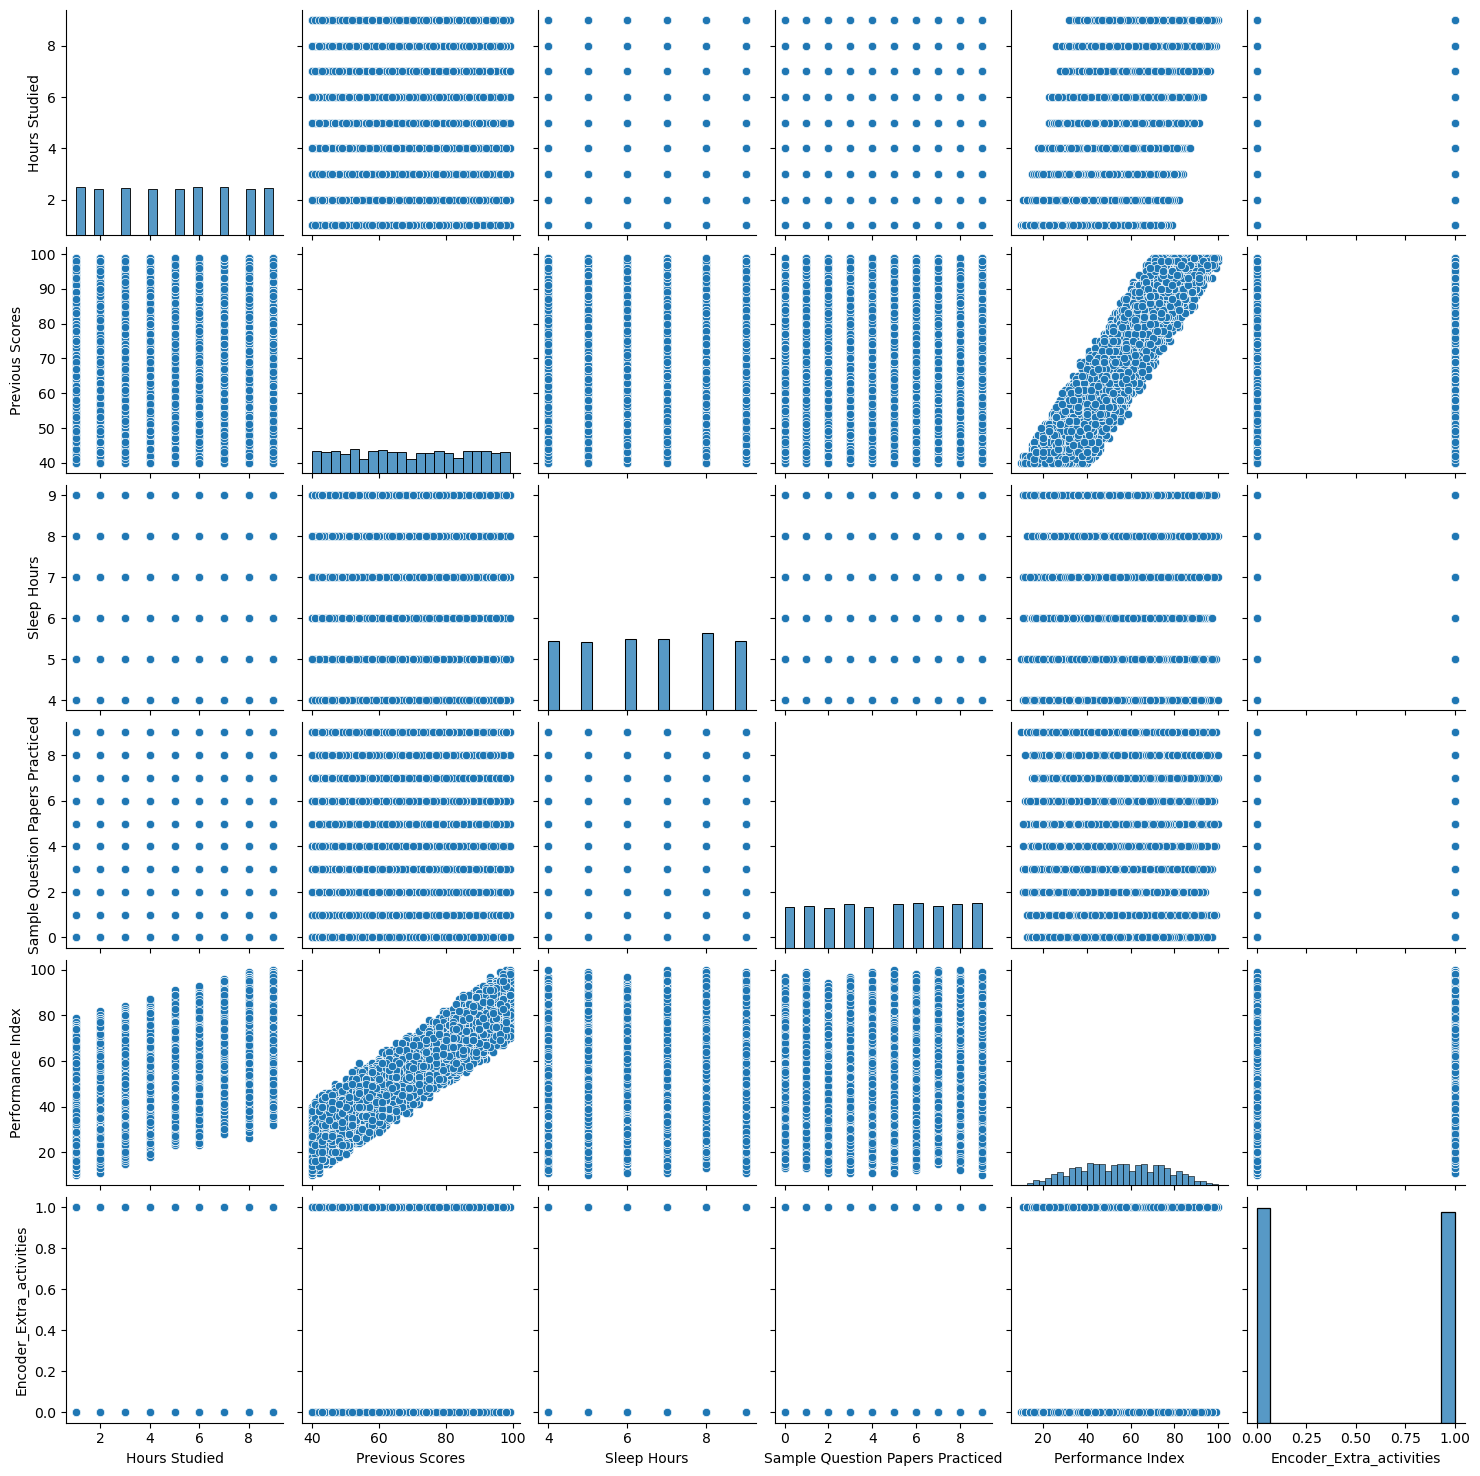

In [111]:
plt.figure()
sns.pairplot(df)
plt.show()

In [112]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Encoder_Extra_activities'],
      dtype='object')

In [113]:
x.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,7,99,9,1
1,4,82,4,2
2,8,51,7,2
3,5,52,5,2
4,7,75,8,5


In [114]:
scaler = MinMaxScaler()
df["scaled_Hours_Studied"]=scaler.fit_transform(df[["Hours Studied"]])
df["scaled_Previous_Scores"]=scaler.fit_transform(df[["Previous Scores"]])
df["scaled_Sleep_Hours"]=scaler.fit_transform(df[["Sleep Hours"]])
df["scaled_SQ_Papers_Practiced"]=scaler.fit_transform(df[["Sample Question Papers Practiced"]])
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index,Encoder_Extra_activities,scaled_Hours_Studied,scaled_Previous_Scores,scaled_Sleep_Hours,scaled_SQ_Papers_Practiced
0,7,99,Yes,9,1,91.0,1,0.750,1.000000,1.0,0.111111
1,4,82,No,4,2,65.0,0,0.375,0.711864,0.0,0.222222
2,8,51,Yes,7,2,45.0,1,0.875,0.186441,0.6,0.222222
3,5,52,Yes,5,2,36.0,1,0.500,0.203390,0.2,0.222222
4,7,75,No,8,5,66.0,0,0.750,0.593220,0.8,0.555556


In [115]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index',
       'Encoder_Extra_activities', 'scaled_Hours_Studied',
       'scaled_Previous_Scores', 'scaled_Sleep_Hours',
       'scaled_SQ_Papers_Practiced'],
      dtype='object')

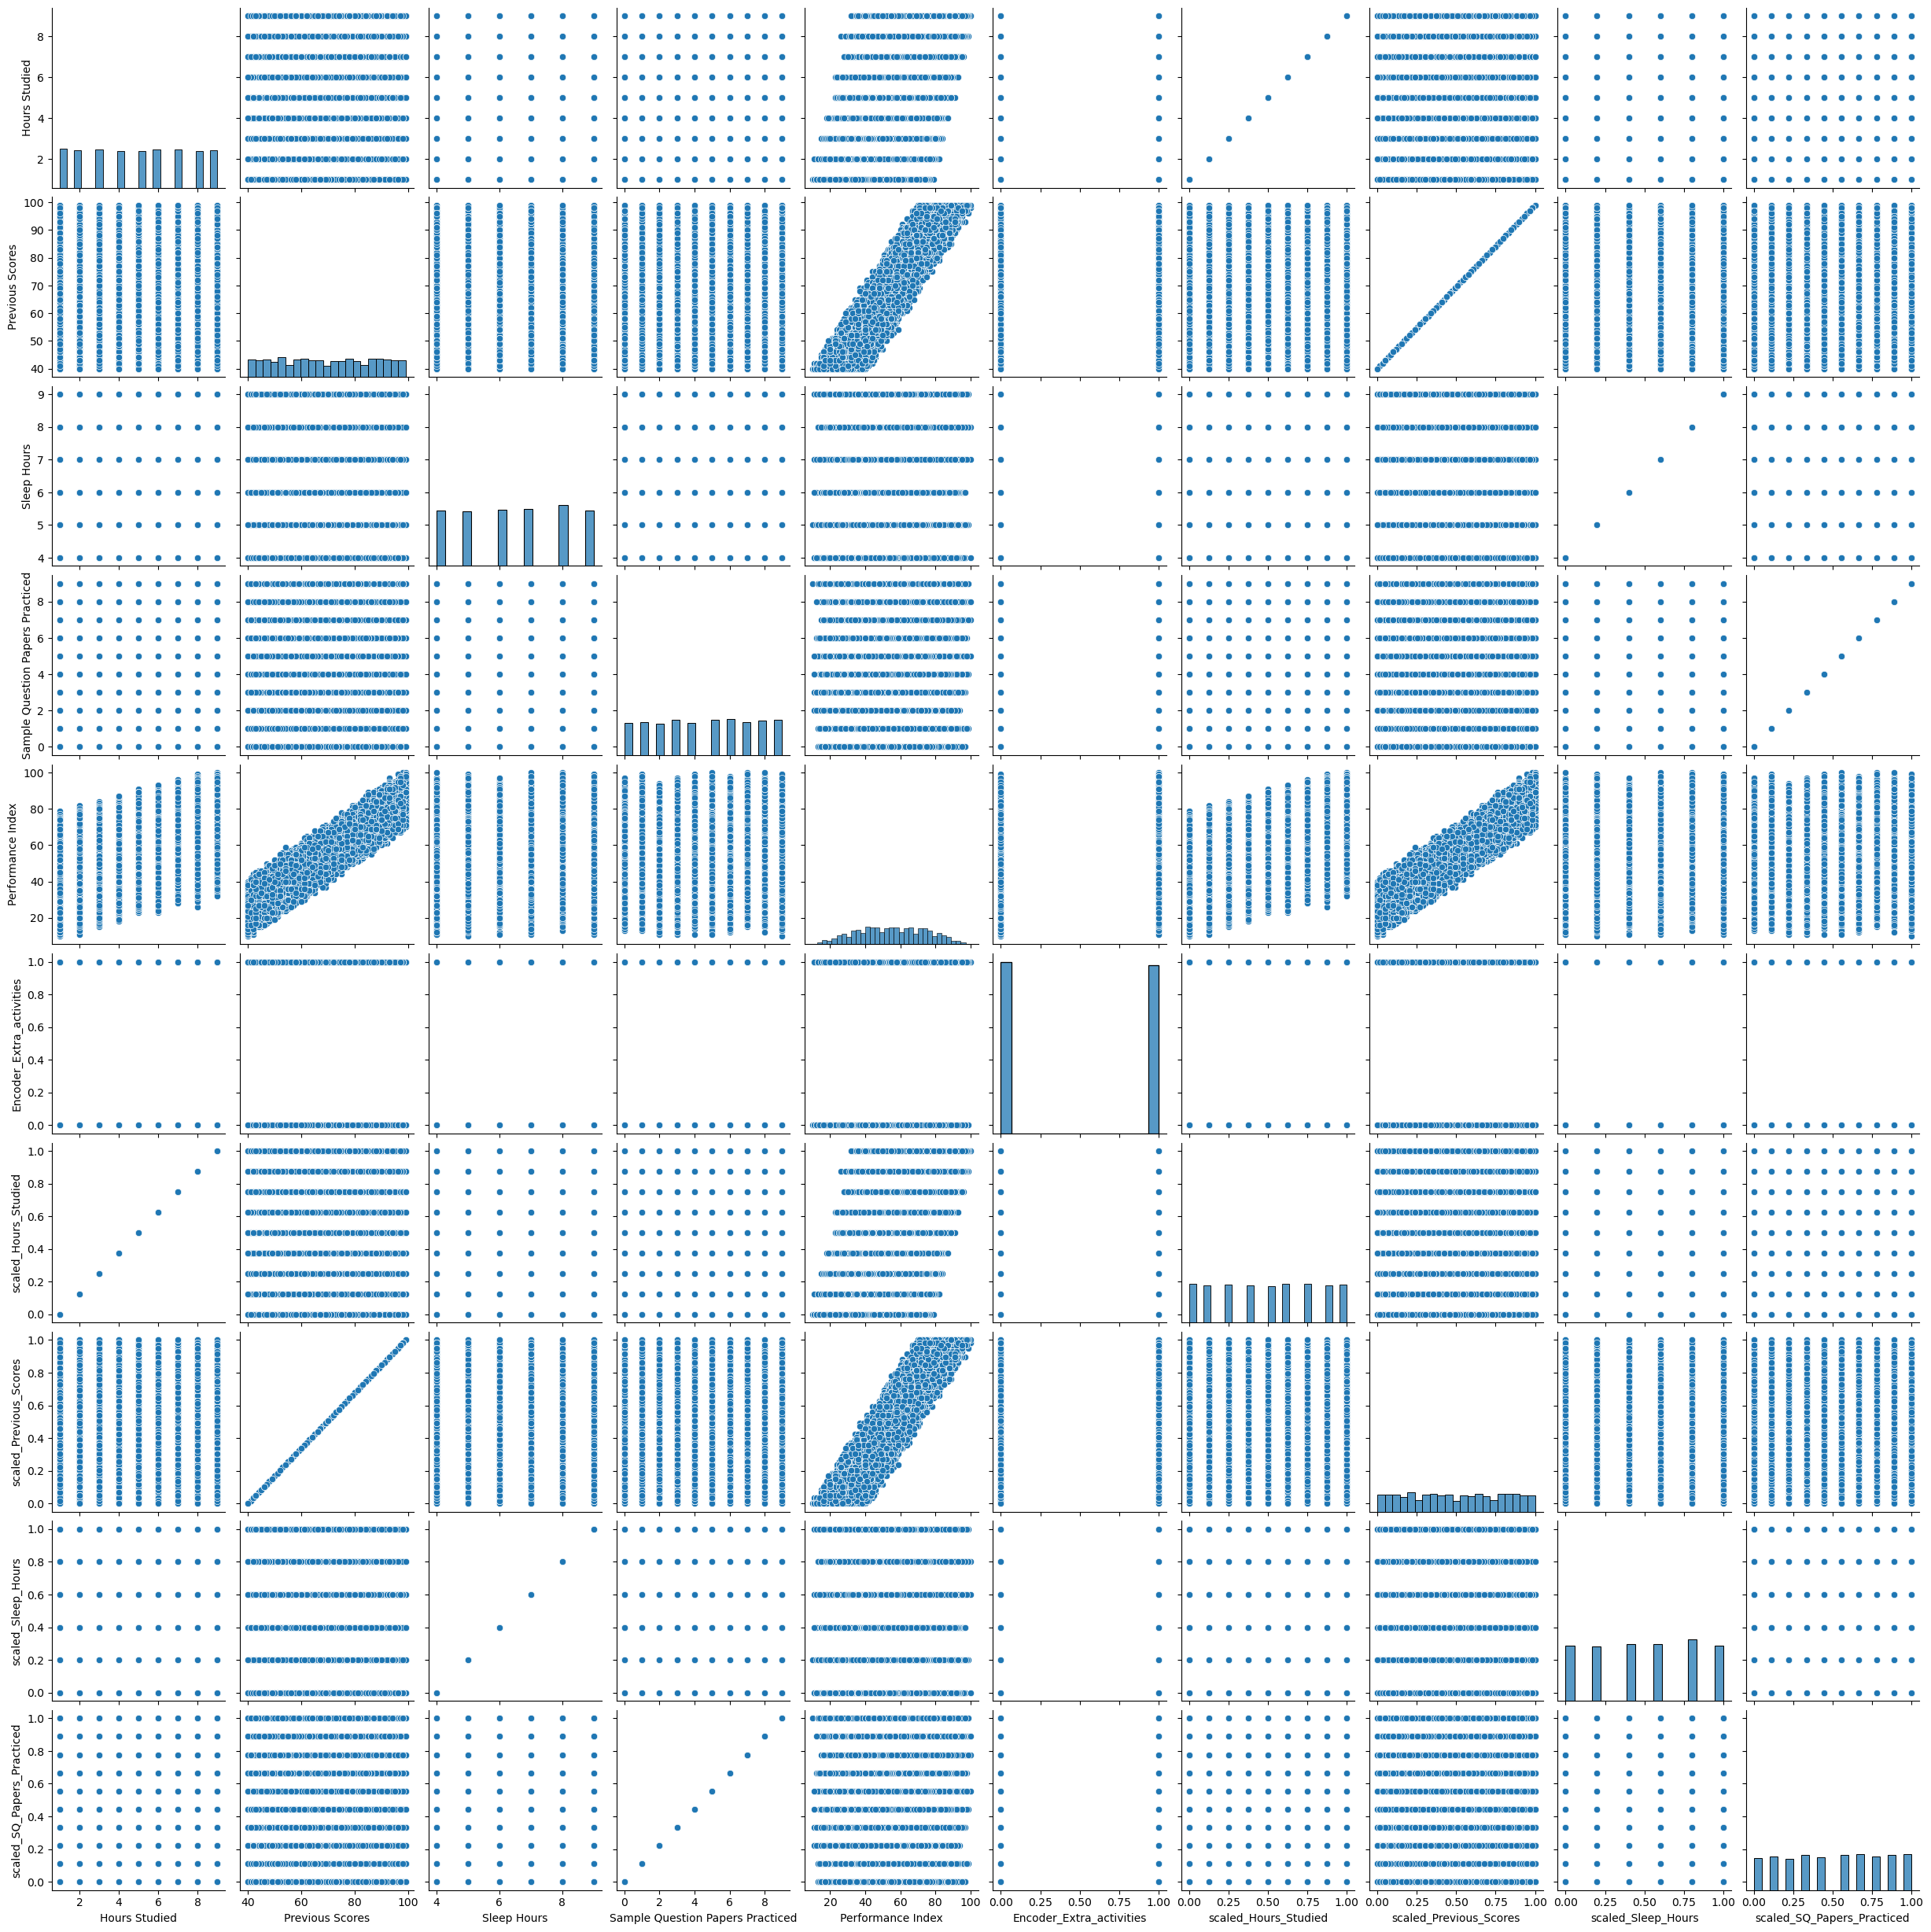

In [116]:
sns.pairplot(df)

In [117]:
x.shape, y.shape

((9873, 4), (9873,))

In [118]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [119]:
x_train.shape ,y_test.shape

((7898, 4), (1975,))

In [120]:
model = LinearRegression()
model.fit(x_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
model.intercept_, model.coef_

(np.float64(-33.68751100802528),
 array([2.85143667, 1.01856238, 0.46782827, 0.19042387]))

In [122]:
x = df[['Hours Studied', 'Previous Scores',
       'Sleep Hours', 'Sample Question Papers Practiced']]
y = df['Performance Index']

In [123]:
pred = model.predict(x_test)
pred

array([46.19748888, 80.00489709, 60.77355645, ..., 76.78608828,
       85.96692251, 35.58247558], shape=(1975,))

In [124]:
mean_squared_error(y_test, pred)*100

444.9346797800399

In [125]:
r2_score(y_test, pred)

0.9880446845278523

In [128]:
ridge = Ridge()
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)
mean_squared_error(y_test, y_pred_ridge) *100

In [129]:
r2_score(y_test, y_pred_ridge)

0.9880446504452214

In [132]:
## polynomial
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=2)
poly_features = polynomial.fit_transform(x_train)
model = LinearRegression()
model.fit(poly_features, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [133]:
model.coef_, model.intercept_

(array([ 0.00000000e+00,  2.74794538e+00,  1.02981052e+00,  2.95218770e-01,
         1.72208333e-01,  2.70849294e-03,  7.26725606e-05,  8.83586765e-03,
         2.91266977e-03, -7.31566599e-05,  6.40286764e-05, -3.94881173e-04,
         7.67858629e-03,  5.26410189e-03, -3.49936143e-04]),
 np.float64(-33.23295666599954))

In [136]:
test_features = polynomial.fit_transform(x_test)
pred = model.predict(test_features)
pred

array([46.21004051, 80.0234896 , 60.75633798, ..., 76.74835744,
       85.90371138, 35.55689454], shape=(1975,))

In [137]:
from sklearn.svm import SVC, SVR

In [150]:
ridge = Ridge() 
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test) 
mean_squared_error(y_test, y_pred_ridge) 

1.4493594821536497